In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
base_skin_dir = os.path.join('..', 'cancer_classifier')

In [13]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [14]:
imageid_path_dict

{'ISIC_0026784': '../cancer_classifier/HAM10000_images_part_1/ISIC_0026784.jpg',
 'ISIC_0028971': '../cancer_classifier/HAM10000_images_part_1/ISIC_0028971.jpg',
 'ISIC_0026948': '../cancer_classifier/HAM10000_images_part_1/ISIC_0026948.jpg',
 'ISIC_0026790': '../cancer_classifier/HAM10000_images_part_1/ISIC_0026790.jpg',
 'ISIC_0028965': '../cancer_classifier/HAM10000_images_part_1/ISIC_0028965.jpg',
 'ISIC_0025299': '../cancer_classifier/HAM10000_images_part_1/ISIC_0025299.jpg',
 'ISIC_0024839': '../cancer_classifier/HAM10000_images_part_1/ISIC_0024839.jpg',
 'ISIC_0024811': '../cancer_classifier/HAM10000_images_part_1/ISIC_0024811.jpg',
 'ISIC_0026960': '../cancer_classifier/HAM10000_images_part_1/ISIC_0026960.jpg',
 'ISIC_0028795': '../cancer_classifier/HAM10000_images_part_1/ISIC_0028795.jpg',
 'ISIC_0026974': '../cancer_classifier/HAM10000_images_part_1/ISIC_0026974.jpg',
 'ISIC_0028781': '../cancer_classifier/HAM10000_images_part_1/ISIC_0028781.jpg',
 'ISIC_0028959': '../cancer_

In [16]:
df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../cancer_classifier/HAM10000_images_part_2/IS...,Benign keratosis-like lesions,2
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,../cancer_classifier/HAM10000_images_part_1/IS...,Benign keratosis-like lesions,2


In [31]:
df.describe(exclude=[np.number])

,lesion_id,image_id,dx,dx_type,sex,localization,path,cell_type
count,10015,10015,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15,10015,7
top,HAM_0001863,ISIC_0031962,nv,histo,male,back,../cancer_classifier/HAM10000_images_part_2/IS...,Melanocytic nevi
freq,6,1,6705,5340,5406,2192,1,6705


In [26]:
df['cell_type'].unique()

array(['Benign keratosis-like lesions ', 'Melanocytic nevi',
       'Dermatofibroma', 'dermatofibroma', 'Vascular lesions',
       'Basal cell carcinoma', 'Actinic keratoses'], dtype=object)

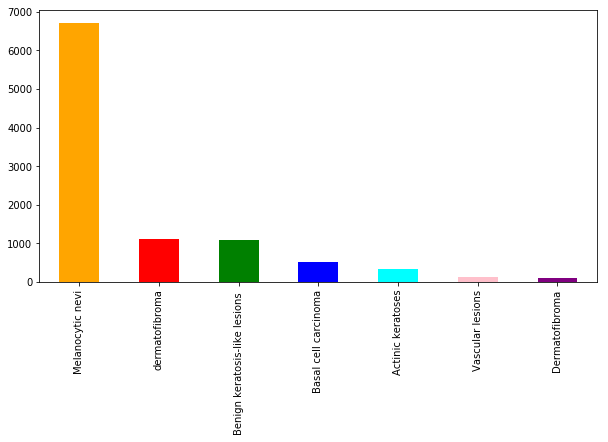

In [37]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
df['cell_type'].value_counts().plot(kind='bar', color=['orange', 'red', 'green', 'blue', 'cyan', 'pink', 'purple'])

In [39]:
# load in all of the images
#don't run it more than once. takes a while

# from skimage.io import imread
# df['image'] = df['path'].map(imread)
# df['image'].map(lambda x: x.shape).value_counts()

#output
# (450, 600, 3)    10015
# Name: image, dtype: int64

#### Show off a few in each category

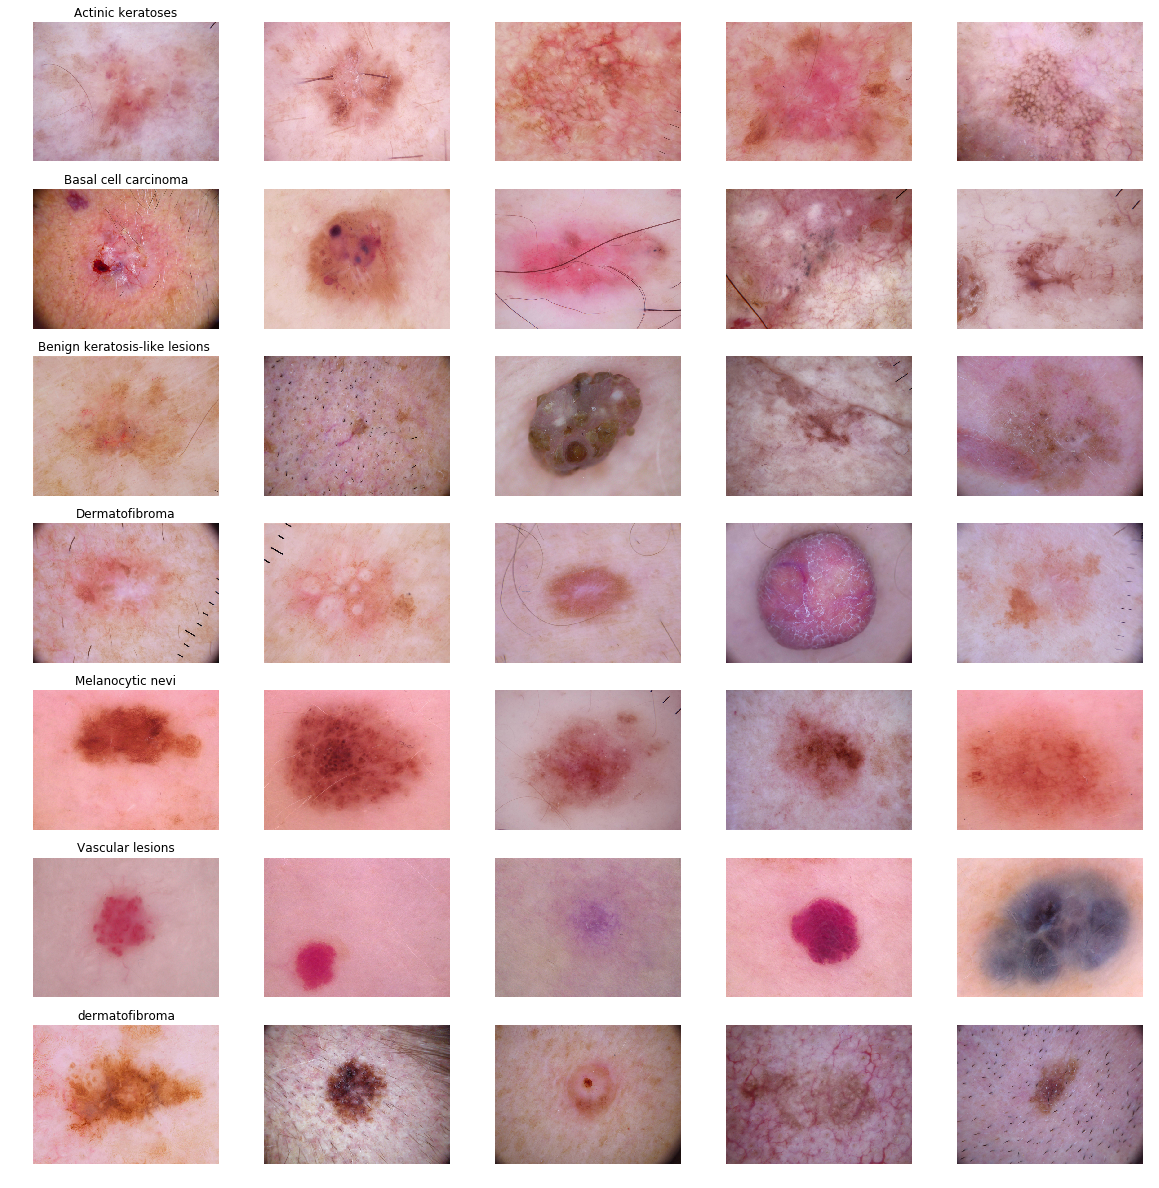

In [47]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)